#### Lesson: Covariance Stationary Processes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import quantecon as qe

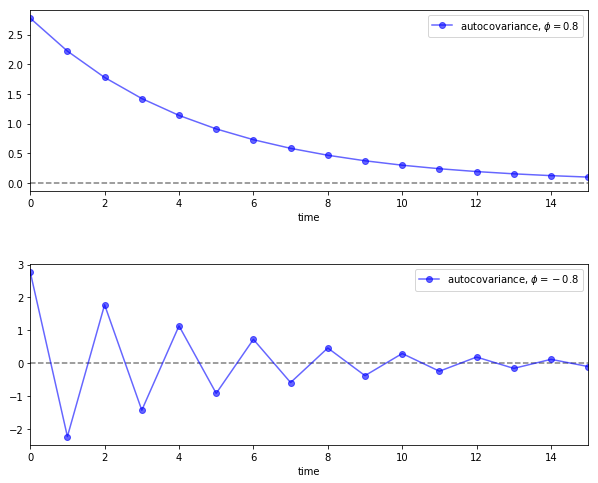

In [2]:
num_rows, num_cols = 2, 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))
plt.subplots_adjust(hspace=0.4)

for i, ϕ in enumerate((0.8, -0.8)):
    ax = axes[i]
    times = list(range(16))
    acov = [ϕ**k / (1 - ϕ**2) for k in times]
    ax.plot(times, acov, 'bo-', alpha=0.6,
            label=f'autocovariance, $\phi = {ϕ:.2}$')
    ax.legend(loc='upper right')
    ax.set(xlabel='time', xlim=(0, 15))
    ax.hlines(0, 0, 15, linestyle='--', alpha=0.5)
plt.show()

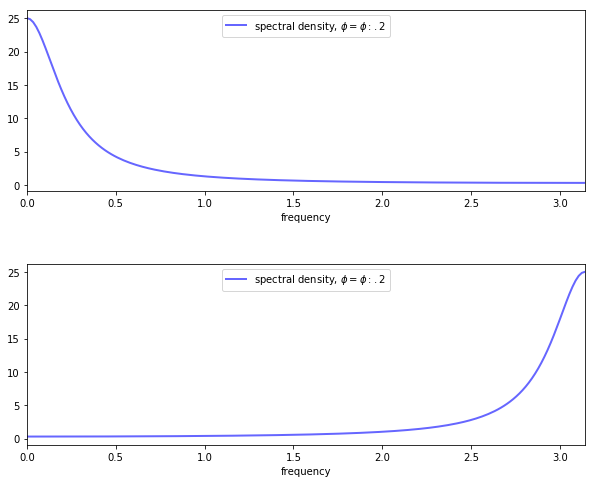

In [3]:
def ar1_sd(ϕ, ω):
    return 1 / (1 - 2 * ϕ * np.cos(ω) + ϕ**2)

ωs = np.linspace(0, np.pi, 180)
num_rows, num_cols = 2, 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))
plt.subplots_adjust(hspace=0.4)

# Autocovariance when phi = 0.8
for i, ϕ in enumerate((0.8, -0.8)):
    ax = axes[i]
    sd = ar1_sd(ϕ, ωs)
    ax.plot(ωs, sd, 'b-', alpha=0.6, lw=2,
            label='spectral density, $\phi = {ϕ:.2}$')
    ax.legend(loc='upper center')
    ax.set(xlabel='frequency', xlim=(0, np.pi))
plt.show()

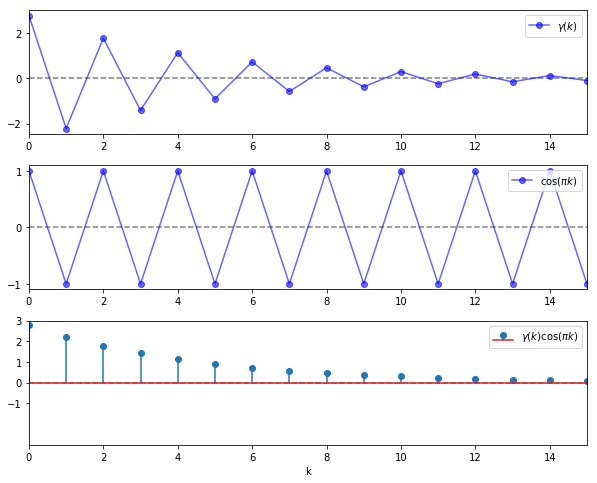

In [4]:
ϕ = -0.8
times = list(range(16))
y1 = [ϕ**k / (1 - ϕ**2) for k in times]
y2 = [np.cos(np.pi * k) for k in times]
y3 = [a * b for a, b in zip(y1, y2)]

num_rows, num_cols = 3, 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))
plt.subplots_adjust(hspace=0.25)

# Autocovariance when ϕ = -0.8
ax = axes[0]
ax.plot(times, y1, 'bo-', alpha=0.6, label='$\gamma(k)$')
ax.legend(loc='upper right')
ax.set(xlim=(0, 15), yticks=(-2, 0, 2))
ax.hlines(0, 0, 15, linestyle='--', alpha=0.5)

# Cycles at frequency π
ax = axes[1]
ax.plot(times, y2, 'bo-', alpha=0.6, label='$\cos(\pi k)$')
ax.legend(loc='upper right')
ax.set(xlim=(0, 15), yticks=(-1, 0, 1))
ax.hlines(0, 0, 15, linestyle='--', alpha=0.5)

# Product
ax = axes[2]
ax.stem(times, y3, label='$\gamma(k) \cos(\pi k)$')
ax.legend(loc='upper right')
ax.set(xlim=(0, 15), ylim=(-3, 3), yticks=(-1, 0, 1, 2, 3))
ax.hlines(0, 0, 15, linestyle='--', alpha=0.5)
ax.set_xlabel("k")

plt.show()

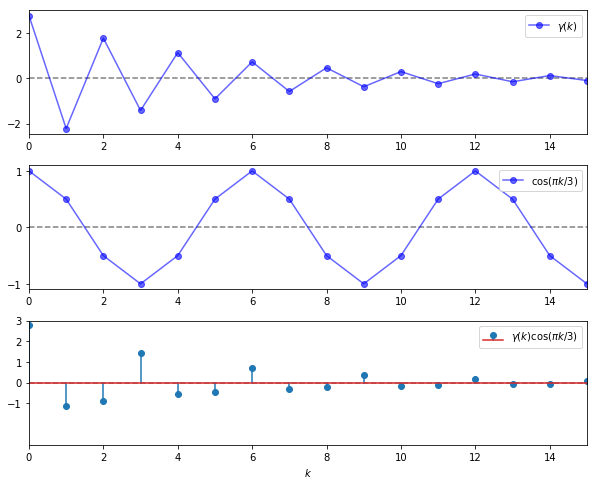

In [5]:
ϕ = -0.8
times = list(range(16))
y1 = [ϕ**k / (1 - ϕ**2) for k in times]
y2 = [np.cos(np.pi * k/3) for k in times]
y3 = [a * b for a, b in zip(y1, y2)]

num_rows, num_cols = 3, 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))
plt.subplots_adjust(hspace=0.25)

# Autocovariance when phi = -0.8
ax = axes[0]
ax.plot(times, y1, 'bo-', alpha=0.6, label='$\gamma(k)$')
ax.legend(loc='upper right')
ax.set(xlim=(0, 15), yticks=(-2, 0, 2))
ax.hlines(0, 0, 15, linestyle='--', alpha=0.5)

# Cycles at frequency π
ax = axes[1]
ax.plot(times, y2, 'bo-', alpha=0.6, label='$\cos(\pi k/3)$')
ax.legend(loc='upper right')
ax.set(xlim=(0, 15), yticks=(-1, 0, 1))
ax.hlines(0, 0, 15, linestyle='--', alpha=0.5)

# Product
ax = axes[2]
ax.stem(times, y3, label='$\gamma(k) \cos(\pi k/3)$')
ax.legend(loc='upper right')
ax.set(xlim=(0, 15), ylim=(-3, 3), yticks=(-1, 0, 1, 2, 3))
ax.hlines(0, 0, 15, linestyle='--', alpha=0.5)
ax.set_xlabel("$k$")

plt.show()

In [6]:
def plot_impulse_response(arma, ax=None):
    if ax is None:
        ax = plt.gca()
    yi = arma.impulse_response()
    ax.stem(list(range(len(yi))), yi)
    ax.set(xlim=(-0.5), ylim=(min(yi)-0.1, max(yi)+0.1),
                 title='Impulse response', xlabel='time', ylabel='response')
    return ax

def plot_spectral_density(arma, ax=None):
    if ax is None:
        ax = plt.gca()
    w, spect = arma.spectral_density(two_pi=False)
    ax.semilogy(w, spect)
    ax.set(xlim=(0, np.pi), ylim=(0, np.max(spect)),
           title='Spectral density', xlabel='frequency', ylabel='spectrum')
    return ax

def plot_autocovariance(arma, ax=None):
    if ax is None:
        ax = plt.gca()
    acov = arma.autocovariance()
    ax.stem(list(range(len(acov))), acov)
    ax.set(xlim=(-0.5, len(acov) - 0.5), title='Autocovariance',
           xlabel='time', ylabel='autocovariance')
    return ax

def plot_simulation(arma, ax=None):
    if ax is None:
        ax = plt.gca()
    x_out = arma.simulation()
    ax.plot(x_out)
    ax.set(title='Sample path', xlabel='time', ylabel='state space')
    return ax

def quad_plot(arma):
    """
    Plots the impulse response, spectral_density, autocovariance,
    and one realization of the process.

    """
    num_rows, num_cols = 2, 2
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
    plot_functions = [plot_impulse_response,
                      plot_spectral_density,
                      plot_autocovariance,
                      plot_simulation]
    for plot_func, ax in zip(plot_functions, axes.flatten()):
        plot_func(arma, ax)
    plt.tight_layout()
    plt.show()

D:\programs\Anaconda\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\programs\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)
D:\programs\Anaconda\lib\site-packages\matplotlib\artist.py:913: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  return func(v)
D:\programs\Anaconda\lib\site-packages\matplotlib\transforms.py:954: ComplexWarning: Casting complex values to real discards the imaginary part
  self._points[:, 1] = interval


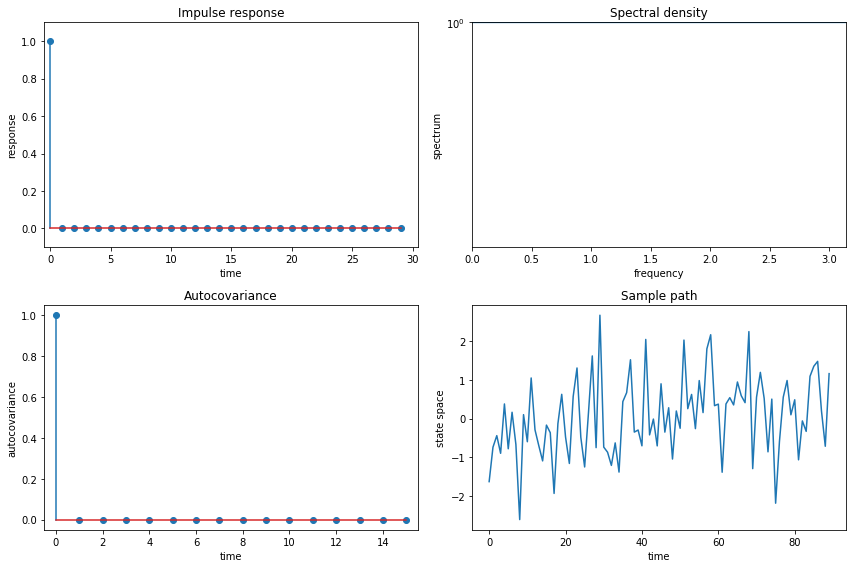

In [7]:
ϕ = 0.0
θ = 0.0
arma = qe.ARMA(ϕ, θ)
quad_plot(arma)

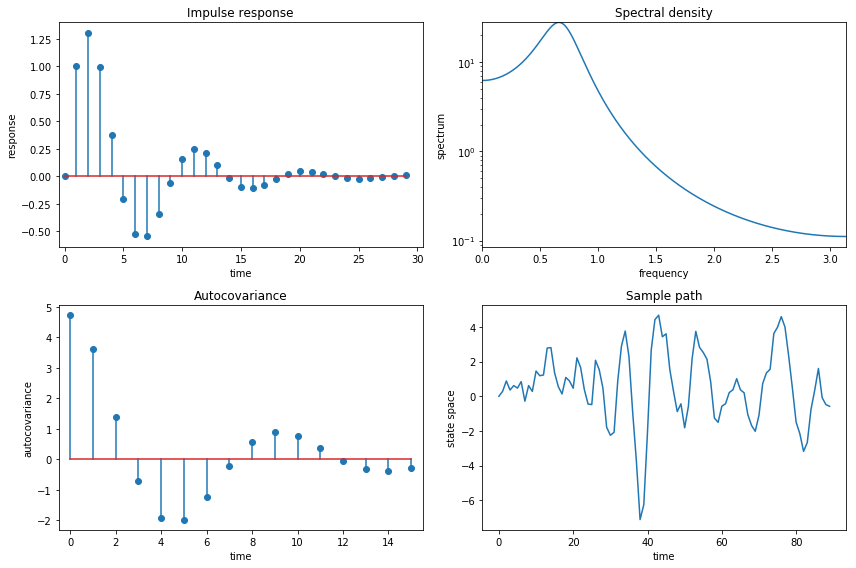

In [8]:
ϕ = 1.3, -.7
θ = 0.0
arma = qe.ARMA(ϕ, θ)
quad_plot(arma)